Project: ETL on Uber and Lyft data to provide valuable insight.
    -potentially implement (a) machine learning model(s).
    
Cleaning steps:
    (1) remove asterisks from the end of each column name
    (2) get rid of the last row, which only contains the total number of miles
    (3) split "START_DATE column into individual data and time columns since START_DATE contains both the data and time on one string
    (4) do (3) for END_DATE column
    (5) re-order the columns

datasets used:
    -"My Uber Drives - 2016.csv" (https://www.kaggle.com/datasets/zusmani/uberdrives?resource=download) renamed   "my_Uber_Drives_2016.csv"
    -"rideshare_kaggle.csv" (https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)

In [1]:
# imports
import datetime
import re
import csv
import numpy as np
import pandas as pd
from pprint import pprint

# visualization imports
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact  

A function to read and clean the "My Uber Drives - 2016.csv" dataset 

In [14]:
def get_uber_data():
    # read the csv file and convert the data to a Pandas DataFrame
    with open(r'C:\Users\dylan\OneDrive\Documents\Personal Projects\Uber\my_Uber_Drives_2016.csv') as fin:
        d = list(csv.reader(fin))
        
        '''
         strip the asterisks from the end of the column names and get rid of the last row, which only 
         contains the total miles 
         '''
        my_uber_data = pd.DataFrame(d[1:], columns = [col[:-1] for col in d[0]])[:-1]
        
        my_uber_data['DURATION'] = (pd.to_datetime(my_uber_data.END_DATE)-pd.to_datetime(my_uber_data.START_DATE)) / pd.Timedelta(minutes=1)
        
        '''
        Seperate the START_DATE column into START_DATE and START_TIME
        Seperate the END_DATE column into END_DATE and END_TIME
        '''
        my_uber_data['START_TIME'] = np.NaN
        my_uber_data['END_TIME'] = np.NaN
        for i in range(len(my_uber_data)) :
            my_uber_data.START_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.START_DATE[i]).group()
            my_uber_data.START_DATE[i] = re.search(r'\d{1,2}/\d{1,2}/\d{4}', my_uber_data.START_DATE[i]).group()
            my_uber_data.END_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.END_DATE[i]).group()
            my_uber_data.END_DATE[i] = re.search(r'\d{1,2}/\d{1,2}/\d{4}', my_uber_data.END_DATE[i]).group()
        '''
        Re-order the columns
        '''        
        start = my_uber_data.START_TIME
        end = my_uber_data.END_TIME
        my_uber_data = my_uber_data.drop(columns = ['START_TIME', 'END_TIME'])
        my_uber_data.insert(loc = 1, column = 'START_TIME', value = start)
        my_uber_data.insert(loc = 3, column = 'END_TIME', value = end)
        
        # convert to correct data types
        my_uber_data['MILES'] = my_uber_data['MILES'].astype(float)
        
        # fill empty values
        my_uber_data.PURPOSE.replace('', 'Not Specified', inplace=True)
        
        return my_uber_data
        
#### Function Call ####
get_uber_data()


C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_uber_data.START_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.START_DATE[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_uber_data.END_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.END_DATE[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

,START_DATE,START_TIME,END_DATE,END_TIME,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,1/1/2016,21:11,1/1/2016,21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,1/2/2016,01:25,1/2/2016,01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Specified,12.0
2,1/2/2016,20:25,1/2/2016,20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,1/5/2016,17:31,1/5/2016,17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,1/6/2016,14:42,1/6/2016,15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...,...,...
1150,12/31/2016,01:07,12/31/2016,01:14,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,12/31/2016,13:24,12/31/2016,13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,12/31/2016,15:03,12/31/2016,15:38,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,12/31/2016,21:32,12/31/2016,21:50,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


A function to read and clean the Rideshare kaggle data

In [3]:
def get_rideshare_data():
    rideshare_kaggle_data = pd.read_csv(r'C:\Users\dylan\OneDrive\Documents\Personal Projects\Uber\rideshare_kaggle.csv')
    '''
    We have no interest in the temperature data
    '''
    cols = ['datetime', 'timezone', 'source', 'destination', 'cab_type','price', 'distance', 'short_summary']
    df = pd.DataFrame(rideshare_kaggle_data, columns = cols)
    # replace any NaN values with 0 in the price column
    df.price = np.where(np.isnan(df.price), 0, df.price)
    # get a list of all other columns containing any NaN values and replace with ''
    nanCols = list(df.isna().any()[lambda x:x])
    for col in nanCols:
        df[col] = np.where(np.isnan(df[col]), '', df[col])
        
    
    # split datetime into date and time columns
    df['date'] = np.NaN
    df['time'] = np.NaN
    for i in range(len(df)) :
        df.date[i] = re.search(r'\d{4}-\d{1,2}-\d{1,2}', df.datetime[i]).group()
        df.time[i] = re.search(r'\d{2}:\d{2}', df.datetime[i]).group() 
        
        
    '''
    Re-order the columns
    '''        
    dt = df.date
    tm = df.time
    df = df.drop(columns = ['datetime', 'date', 'time'])
    df.insert(loc = 0, column = 'date', value = dt)
    df.insert(loc = 1, column = 'time', value = tm)
        
    return df.sort_values(by = 'price', ascending = False)
    

#### Function Call ####
get_rideshare_data()


C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] = re.search(r'\d{4}-\d{1,2}-\d{1,2}', df.datetime[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = re.search(r'\d{2}:\d{2}', df.datetime[i]).group()


,date,time,timezone,source,destination,cab_type,price,distance,short_summary
597071,2018-12-02,01:28,America/New_York,Financial District,Fenway,Lyft,97.5,4.43,Clear
440000,2018-12-01,20:07,America/New_York,Financial District,Boston University,Lyft,92.0,5.37,Mostly Cloudy
271719,2018-11-29,01:02,America/New_York,Financial District,Boston University,Lyft,92.0,5.39,Mostly Cloudy
280566,2018-11-27,22:03,America/New_York,Financial District,Boston University,Lyft,92.0,5.39,Partly Cloudy
301021,2018-12-17,23:45,America/New_York,Financial District,Boston University,Lyft,92.0,5.36,Overcast
...,...,...,...,...,...,...,...,...,...
566397,2018-12-18,10:40,America/New_York,South Station,North Station,Uber,0.0,2.29,Mostly Cloudy
423140,2018-11-26,16:41,America/New_York,North Station,Northeastern University,Uber,0.0,3.30,Overcast
423143,2018-12-18,14:10,America/New_York,West End,North End,Uber,0.0,1.23,Mostly Cloudy
122089,2018-11-27,10:03,America/New_York,Northeastern University,Back Bay,Uber,0.0,1.49,Light Rain


# Visuals

A histogram plotting distance of trips by purpose
data: my_uber_data

In [15]:
def plot_distance():
    
    df = get_uber_data().groupby('PURPOSE', as_index=False)['DURATION'].mean()


    @interact(PURPOSE=widgets.Dropdown(options=['All', 'Airport/Travel', 'Between Offices', \
                                                'Charity ($)', 'Commute', 'Customer Visit', \
                                                'Errand/Supplies', 'Meal/Entertain', 'Meeting',\
                                                'Moving', 'Temporary Site'], value='All', description='Purpose'))
    def f(PURPOSE):
        try:
            if PURPOSE != 'All':
                df.PURPOSE = df.PURPOSE.astype(str)
                df1 = df[df['PURPOSE'] == PURPOSE]
                fig = sns.barplot(
                    x=df1.PURPOSE,
                    y=df1.DURATION,
                    data=df1
                )
            else:
                df.PURPOSE = df.PURPOSE.astype(str)
                fig = sns.barplot(
                    x=df.PURPOSE,
                    y=df.DURATION,
                    data=df
                )
                fig.set_xticklabels(fig.get_xticklabels(), rotation=25, size=8)
                
            fig.set_title('Average Ride Duration by Purpose')
            
        except Exception as e:
            print("uh oh")

    
    
    
#### Function Call ####
plot_distance()

C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_uber_data.START_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.START_DATE[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_uber_data.END_TIME[i] = re.search(r'\s{1}(\d{2}:\d{2})', my_uber_data.END_DATE[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3604205473.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

interactive(children=(Dropdown(description='Purpose', options=('All', 'Airport/Travel', 'Between Offices', 'Ch…

## Rideshare Visuals

C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] = re.search(r'\d{4}-\d{1,2}-\d{1,2}', df.datetime[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = re.search(r'\d{2}:\d{2}', df.datetime[i]).group()


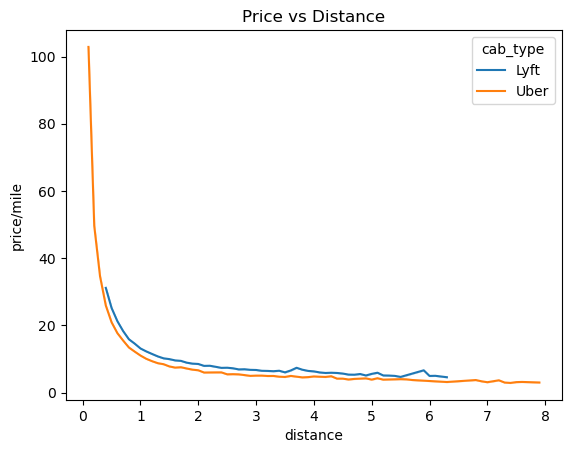

In [37]:
def get_price_vis():
    df = get_rideshare_data()
    df.distance = round(df.distance, 1)
    df.price = df.groupby(['cab_type', 'distance'], as_index=False).price.transform('mean')
    df['price/mile'] = df.price / df.distance
    plot = sns.lineplot(
        data=df, 
        x='distance', 
        y='price/mile', 
        hue='cab_type',
        markers=True
    )
    plot.set_title('Price vs Distance')
   # pprint(df)
    
get_price_vis()

C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] = re.search(r'\d{4}-\d{1,2}-\d{1,2}', df.datetime[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = re.search(r'\d{2}:\d{2}', df.datetime[i]).group()


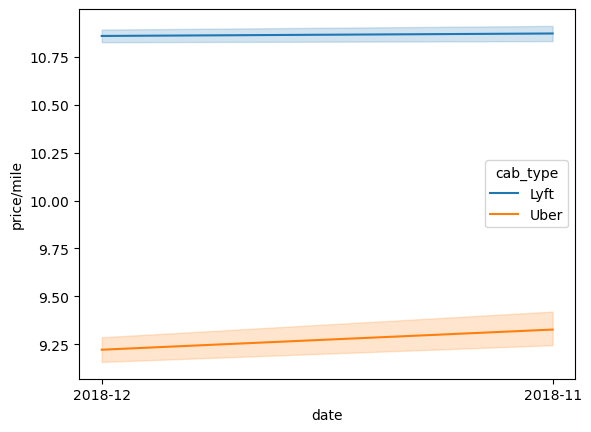

In [39]:
def price_per_mile():
    df = get_rideshare_data()
    df.date = pd.to_datetime(df.date)
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df.date = df.date.dt.strftime('%Y-%m')

    
    df.price = df.groupby(['cab_type', 'year', 'month'], as_index=False).price.transform('mean')
    df['price/mile'] = df.price / df.distance
    
    plot = sns.lineplot(
        data=df,
        x='date',
        y='price/mile',
        hue='cab_type'
    )



price_per_mile()

C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] = re.search(r'\d{4}-\d{1,2}-\d{1,2}', df.datetime[i]).group()
C:\Users\dylan\AppData\Local\Temp\ipykernel_5876\3117578132.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = re.search(r'\d{2}:\d{2}', df.datetime[i]).group()


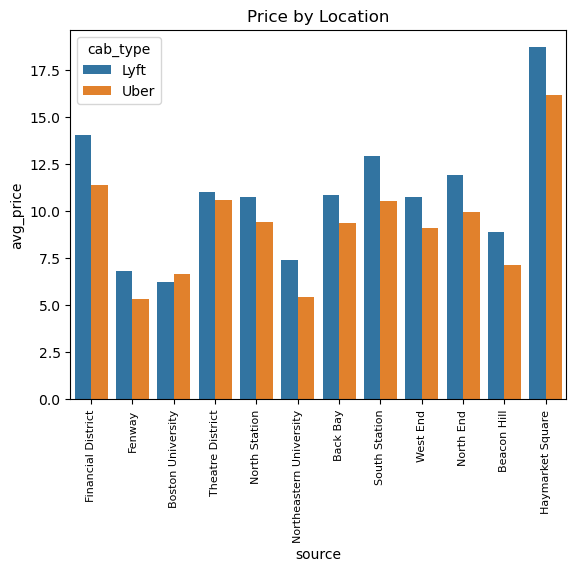

In [45]:
def expens_locations():
    df = get_rideshare_data()
    df.price = df.groupby('cab_type').price.transform('mean')
    df['price/mile']= df.price / df.distance
    df['avg_price'] = df.groupby(['cab_type', 'source'])['price/mile'].transform('mean')
    
    plot = sns.barplot(
        data=df,
        x='source',
        y='avg_price',
        hue='cab_type'
    )
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90, size=8)
    plot.set_title('Price by Location')
    
    
expens_locations()